# Proyecto #1: Notebook Diabetes

### Estudiantes
    John Sánchez Cespedes 3021080092
    Luis Carlos Navarro Todd 2022212158
    Victoria Sandí Barrantes 2022146536

### Imports

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer, QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# 1. Análisis Exploratorio de Datos (EDA) y Preprocessing

In [90]:
ds = pd.read_csv("./diabetes.csv")
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploración Estadística de los datos
Antes de hacer cualquier exploración y seguir trabajando con un dataset es importante que el dataset en general tenga datos con cierto sentido, por lo tanto observar la media, los mínimos, los máximos y los cuartiles puede generar una idea inicial.

In [91]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


En este caso, se pueden observar bastantes outliers como un un nivel de insulina de 800. Muy por arriba de los valores de los cuartiles y de la media. Además hay varios mínimos en 0, como el BMI, Insulina, Presión, etc... que no son médicamente posibles.

## Ver balance de los datos

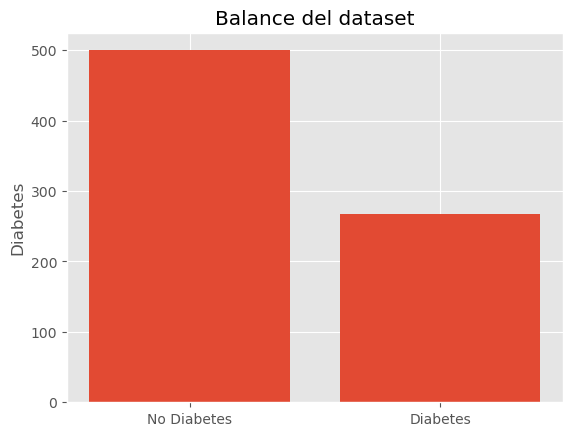

In [92]:
fig, ax = plt.subplots()

ax.bar(["No Diabetes", "Diabetes"], ds.value_counts("Outcome"))

ax.set_ylabel("Diabetes")
ax.set_title("Balance del dataset")

plt.show()

Como se puede observar los datos están desbalanceados. Hay más casos sin diabetes en el dataset.

## Valores faltantes
Para manejar los valores faltantes en la glucosa, presión, grosor de piel, insulina y BMI se utilizará una función que compare la media de cada variable dependiendo de la salida (0 o 1). Además se marcaran los valores inválidos como nulos.

In [93]:
ds[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = ds[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [94]:
ds.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Se puede observar cómo hay varios datos faltantes.

In [95]:
def median_target(var):   
    temp = ds[ds[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

#### Glucosa

In [96]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


Se utilizará 107 para la gente sin diabetes y 140 para la gente con diabetes.

In [97]:
ds.loc[(ds['Outcome'] == 0 ) & (ds['Glucose'].isnull()), 'Glucose'] = 102.5
ds.loc[(ds['Outcome'] == 1 ) & (ds['Glucose'].isnull()), 'Glucose'] = 169.5

#### Presión

In [98]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


Se utilizará 70 para la gente sin diabetes y 74.5 para la gente con diabetes.

In [99]:
ds.loc[(ds['Outcome'] == 0 ) & (ds['BloodPressure'].isnull()), 'BloodPressure'] = 70.0
ds.loc[(ds['Outcome'] == 1 ) & (ds['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

#### Grosor de Piel

In [100]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


Se utilizará 27 para la gente sin diabetes y 32 para la gente con diabetes.

In [101]:
ds.loc[(ds['Outcome'] == 0 ) & (ds['SkinThickness'].isnull()), 'SkinThickness'] = 27.0
ds.loc[(ds['Outcome'] == 1 ) & (ds['SkinThickness'].isnull()), 'SkinThickness'] = 32.0

#### Insulina

In [102]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


Se utilizará 102.5 para la gente sin diabetes y 169.5 para la gente con diabetes.

In [103]:
ds.loc[(ds['Outcome'] == 0 ) & (ds['Insulin'].isnull()), 'Insulin'] = 102.5
ds.loc[(ds['Outcome'] == 1 ) & (ds['Insulin'].isnull()), 'Insulin'] = 169.5

#### BMI

In [104]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


Se utilizará 30.1 para la gente sin diabetes y 34.3 para la gente con diabetes.

In [105]:
ds.loc[(ds['Outcome'] == 0 ) & (ds['BMI'].isnull()), 'BMI'] = 30.1
ds.loc[(ds['Outcome'] == 1 ) & (ds['BMI'].isnull()), 'BMI'] = 34.3

#### Después de limpieza de nulos

In [106]:
ds.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [107]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.736328,30.557251,44.000,99.75000,117.0000,141.00000,199.00
BloodPressure,768.0,72.389323,12.106039,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.089844,8.890820,7.000,25.00000,28.0000,32.00000,99.00
Insulin,768.0,141.753906,89.100847,14.000,102.50000,102.5000,169.50000,846.00
BMI,768.0,32.434635,6.880498,18.200,27.50000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Outliers restantes
Hace falta tratar los outliers restantes, por lo tanto se visualizarán con un boxplot por feature.

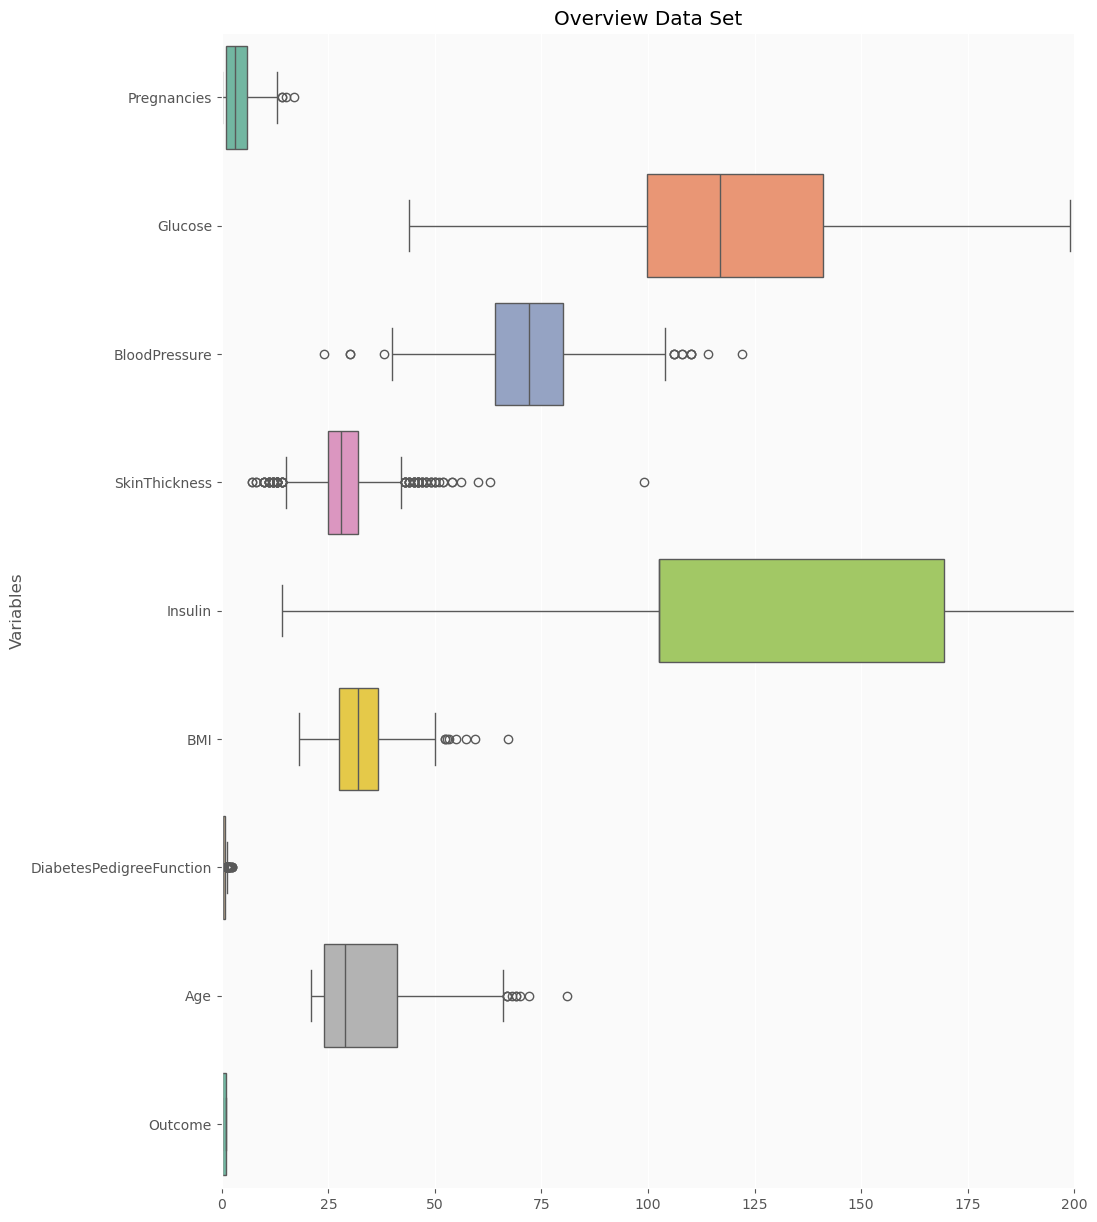

In [108]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(ds, 
  orient = 'h', 
  palette = 'Set2')



Para tratar los outliers se utilizará la técnica de IQR.

In [ ]:
def mod_outlier(df):
    df1 = df.copy()
    df = df._get_numeric_data()


    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)


    for col in list(df):
        for i in range(0,len(df[col])):
            if df.loc[i, col] < lower_bound[col]:            
                df.loc[i, col] = lower_bound[col]

            if df.loc[i, col] > upper_bound[col]:            
                df.loc[i, col] = upper_bound[col]    


    for col in list(df):
        df1[col] = df[col]

    return(df1)

In [110]:
ds = mod_outlier(ds)
ds.describe().T

/tmp/ipykernel_79637/4034705223.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][i] = upper_bound[col]
/tmp/ipykernel_79637/4034705223.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.837240,3.344157,0.000,1.00000,3.0000,6.00000,13.50
Glucose,768.0,121.736328,30.557251,44.000,99.75000,117.0000,141.00000,199.00
BloodPressure,768.0,72.360677,11.706821,40.000,64.00000,72.0000,80.00000,104.00
SkinThickness,768.0,28.848307,7.559161,14.500,25.00000,28.0000,32.00000,42.50
Insulin,768.0,133.085938,58.124185,14.000,102.50000,102.5000,169.50000,270.00
BMI,768.0,32.372786,6.672767,18.200,27.50000,32.0500,36.60000,50.25
DiabetesPedigreeFunction,768.0,0.458914,0.285596,0.078,0.24375,0.3725,0.62625,1.20
Age,768.0,33.199870,11.628404,21.000,24.00000,29.0000,41.00000,66.50
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Selección de features
Para seleccionar los features que se utilizarán en el modelo hay que visualizar la correlación entre las diferentes variables independientes y la variable dependiente para ver si tienen un peso significativo para tomarlas en cuenta o están generando ruido.

<Axes: >

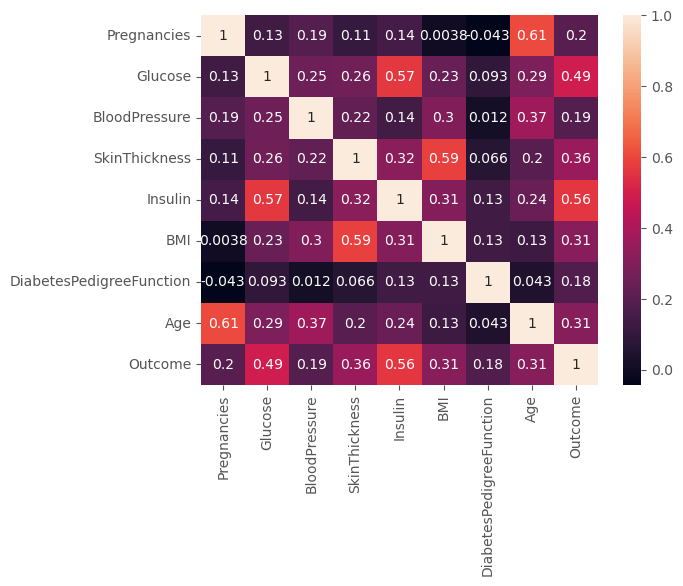

In [111]:
sns.heatmap(ds.corr('spearman'),annot=True)

Como se puede observar los embarazos, la presión y Diabetes Pedigree Function son variables con una correlación <= 0.2. Por lo tanto, parece una opción dejar las variables por fuera. Otra selección posible es utilizar únicamente las 3 variables con más correlación: La glucosa, la insulina y el grosor de la piel. Los datasets serán etiquetados como M2 (Mayor que 0.2) y MC (Mayor correlación).

In [112]:
X = ds.drop(["Outcome"], axis=1)
X_M2 = ds.drop(["Pregnancies", "BloodPressure", "DiabetesPedigreeFunction", "Outcome"], axis=1)
X_MC = ds.drop(["Pregnancies", "BloodPressure", "DiabetesPedigreeFunction", "BMI", "Age", "Outcome"], axis=1)
y = ds["Outcome"]

### Estandarización

In [113]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_M2 = sc.fit_transform(X_M2)
X_MC = sc.fit_transform(X_MC)

### Normalización

In [114]:
normalizer = Normalizer()
X = normalizer.fit_transform(X)
X_M2 = normalizer.fit_transform(X_M2)
X_MC = normalizer.fit_transform(X_MC)

### División de los datos

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
X_M2_train, X_M2_test, y_M2_train, y_M2_test = train_test_split(X_M2, y, test_size=0.2, random_state=0, shuffle=True)
X_MC_train, X_MC_test, y_MC_train, y_MC_test = train_test_split(X_MC, y, test_size=0.2, random_state=0, shuffle=True)

## Modelo Scikit learn

Inicializar el modelo de regresión logística de Scikit learn

In [116]:
lgModel = LogisticRegression(random_state=42)
lgModel_M2 = LogisticRegression(random_state=42)
lgModel_MC = LogisticRegression(random_state=42)

Ajustar el modelo al conjunto de entrenamiento

In [117]:
lgModel.fit(X_train, y_train)
lgModel_M2.fit(X_M2_train, y_M2_train)
lgModel_MC.fit(X_MC_train, y_MC_train)

LogisticRegression(random_state=42)

Predecir en el conjunto de prueba

In [118]:
y_pred = lgModel.predict(X_test)
y_M2_pred = lgModel_M2.predict(X_M2_test)
y_MC_pred = lgModel_MC.predict(X_MC_test)

#### Evaluar el rendimiento de los modelos

In [119]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_M2 = accuracy_score(y_M2_test, y_M2_pred)
accuracy_MC = accuracy_score(y_MC_test, y_MC_pred)

print(f'Accuracy del modelo con todos los features: {accuracy}')
print(f'Accuracy del modelo con los features con correlación mayor a 0.2: {accuracy_M2}')
print(f'Accuracy del modelo con los features con mayor correlación: {accuracy_MC}')

Accuracy del modelo con todos los features: 0.8701298701298701
Accuracy del modelo con los features con correlación mayor a 0.2: 0.8766233766233766
Accuracy del modelo con los features con mayor correlación: 0.8766233766233766


#### Informe de clasificación

Todos los features:

In [120]:
informe_clasificacion = classification_report(y_test, y_pred)
print(informe_clasificacion)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       107
           1       0.75      0.87      0.80        47

    accuracy                           0.87       154
   macro avg       0.84      0.87      0.85       154
weighted avg       0.88      0.87      0.87       154



Features con correlación > 0.2

In [121]:
informe_clasificacion_M2 = classification_report(y_M2_test, y_M2_pred, target_names=["No Diabetes", "Diabetes"])
print(informe_clasificacion_M2)

              precision    recall  f1-score   support

 No Diabetes       0.94      0.88      0.91       107
    Diabetes       0.76      0.87      0.81        47

    accuracy                           0.88       154
   macro avg       0.85      0.88      0.86       154
weighted avg       0.88      0.88      0.88       154



Features con más correlación

In [122]:
informe_clasificacion_MC = classification_report(y_MC_test, y_MC_pred, target_names=["No Diabetes", "Diabetes"])
print(informe_clasificacion_MC)

              precision    recall  f1-score   support

 No Diabetes       0.95      0.87      0.91       107
    Diabetes       0.75      0.89      0.82        47

    accuracy                           0.88       154
   macro avg       0.85      0.88      0.86       154
weighted avg       0.89      0.88      0.88       154



## Modelo KNN Scikit Learn

### ¿Cuál es el mejor K?

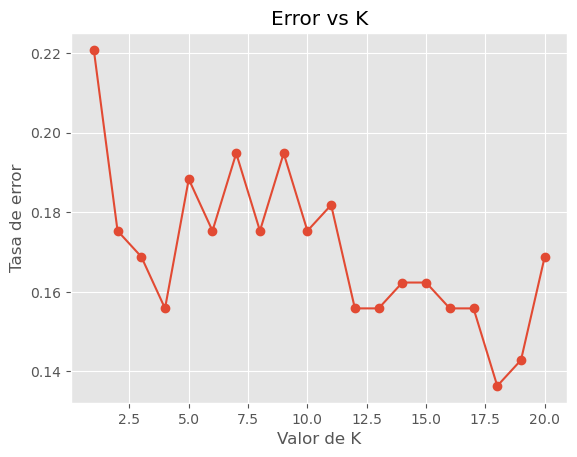

In [63]:
# Para buscar el mejor valor de k
errores = []
for k in range(1, 21):
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    errores.append(1 - accuracy_score(y_test, pred))

plt.plot(range(1, 21), errores, marker='o')
plt.title("Error vs K")
plt.xlabel("Valor de K")
plt.ylabel("Tasa de error")
plt.grid(True)
plt.show()

#### Debido al analisis anterior se tiene que el K que produce menor tasa de error es el 18, pero sin duda para un conjunto de datos considerablemente grande puede llegar a ser computacionalemente costoso. La otra de las opciones es el 4 el produce resultados un poco peores pero a cambio de no ser tan costoso el calculo.

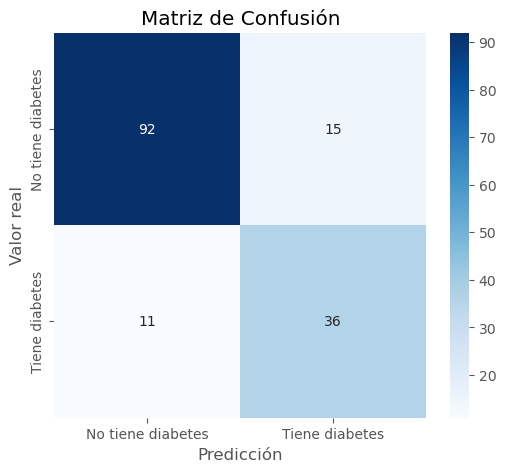


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       107
           1       0.71      0.77      0.73        47

    accuracy                           0.83       154
   macro avg       0.80      0.81      0.81       154
weighted avg       0.84      0.83      0.83       154

Precisión (accuracy): 0.8311688311688312


In [73]:

knn = KNeighborsClassifier(n_neighbors=3)  # Puedes ajustar este valor
knn.fit(X_train, y_train)

# Hacer pruebas al modelo
y_knn_pred = knn.predict(X_test)

# Evaluacion del desempenno
cm = confusion_matrix(y_test, y_knn_pred)
# Mostrar la matriz de confusion
# Etiquetas de las clases
labels = ['No tiene diabetes', 'Tiene diabetes']

# Crear un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()


print("\nReporte de clasificación:\n", classification_report(y_test, y_knn_pred))
print("Precisión (accuracy):", accuracy_score(y_test, y_knn_pred))

### Despues de un analisis se tiene lo siguiente:
Para este caso en particular es de suma importancia mantener el numero de Falsos negativos (Error tipo II) lo mas bajo posible debido a la naturaleza de los datos. Por lo que tiene un peso importante para la toma de decisiones con respecto al k.

#### k=5 
Tiene una precision de 81% y la cantidad de Falsos Negativos es de 13.
#### k=4
Tiene una precision de 84% y la cantidad de Falsos Negativos es de 14.
#### k=3
Tiene una precision de 83% y la cantidad de Falsos Negativos es de 11.
#### k=18
Tiene una precision de 86% y la cantidad de Falsos Negativos es de 11 y costoso computacionalmente.